In [1]:
# auto reload modules when edited
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [3]:
# plt settings and interactive plot
plt.style.use('default')
plt.rcParams['figure.figsize'] = [6, 4]

In [4]:
from ftnmr import *

### Hydrogens and their frequencies and ratios

In [6]:
from string import ascii_lowercase as asc
from scipy.special import binom
from itertools import product

In [6]:
gamma = 267.52218744*pow(10, 6)
B = 10.0

In [7]:
A = {
    'a':(1, 2.3),
    'b':(1, 3.3),
    'c':(3, 4.5)}

j1 = ('a', 'b', 3.200)
j2 = ('b', 'c', 3.200)
B = [j1, j2]

In [87]:
C = {a:[] for a in A}
print(C)

for k in A:
    for b in B:
        if k == b[0]: C[k].append( (b[2], A[b[1]][0]) )
        elif k == b[1]: C[k].append( (b[2], A[b[0]][0]) )

{'a': [], 'b': [], 'c': []}


{'a': [(3.2, 1)], 'b': [(3.2, 1), (3.2, 3)], 'c': [(3.2, 1)]}

In [93]:
F = {a:([], []) for a in A}
for k in A:
    for b, d in C[k]:
        F[k][0].append( np.array([n*b/2 for n in range(-d, d+1, 2)]) )
        F[k][1].append( np.array([binom(d, x)/pow(2,d) for x in range(0, d+1)]))

{'a': ([array([-1.6,  1.6])], [array([0.5, 0.5])]),
 'b': ([array([-1.6,  1.6]), array([-4.8, -1.6,  1.6,  4.8])],
  [array([0.5, 0.5]), array([0.125, 0.375, 0.375, 0.125])]),
 'c': ([array([-1.6,  1.6])], [array([0.5, 0.5])])}

In [23]:
# this combines the above two cells into one

F = {a:([], []) for a in A}

for k in A:
    for b in B:
        if k == b[0]: 
            d = A[b[1]][0]
            F[k][0].append( [n*b[2]/2 for n in range(-d, d+1, 2)] )
            F[k][1].append( [binom(d, x)/pow(2,d) for x in range(0, d+1)] )
        elif k == b[1]: 
            d = A[b[0]][0]
            F[k][0].append( [n*b[2]/2 for n in range(-d, d+1, 2)] )
            F[k][1].append( [binom(d, x)/pow(2,d) for x in range(0, d+1)] )

{'a': ([[-1.6, 1.6]], [[0.5, 0.5]]),
 'b': ([[-1.6, 1.6], [-4.800000000000001, -1.6, 1.6, 4.800000000000001]],
  [[0.5, 0.5], [0.125, 0.375, 0.375, 0.125]]),
 'c': ([[-1.6, 1.6]], [[0.5, 0.5]])}

In [7]:
from itertools import product

In [102]:
G = {a:([], []) for a in A}

for k in A:
    for i in product(*F[k][0]):
        G[k][0].append(sum(i))
        
    for i in product(*F[k][1]):
        G[k][1].append(np.prod(i))

{'a': ([-1.6, 1.6], [0.5, 0.5]),
 'b': ([-6.4,
   -3.2,
   0.0,
   3.2000000000000006,
   -3.2000000000000006,
   0.0,
   3.2,
   6.4],
  [0.0625, 0.1875, 0.1875, 0.0625, 0.0625, 0.1875, 0.1875, 0.0625]),
 'c': ([-1.6, 1.6], [0.5, 0.5])}

In [117]:
I = {k:([],[]) for k in A}

for k in A:
    for n in np.argsort(H[k][0]):
        I[k][0].append(H[k][0][n])
        I[k][1].append(H[k][1][n])

{'a': ([-1.6, 1.6], [0.5, 0.5]),
 'b': ([-6.4,
   -3.2000000000000006,
   -3.2,
   0.0,
   0.0,
   3.2,
   3.2000000000000006,
   6.4],
  [0.0625, 0.0625, 0.1875, 0.1875, 0.1875, 0.1875, 0.0625, 0.0625]),
 'c': ([-1.6, 1.6], [0.5, 0.5])}

In [102]:
K = {k:([J0[k][0]],[J1[k][0]]) for k in A}

for k in A:
    for i in range(1, len(J[k][0])):
        if np.isclose(K[k][0][-1], J[k][0][i]):
            K[k][1][-1] += J[k][1][i]
        else:
            K[k][0].append(J[k][0][i])
            K[k][1].append(J[k][1][i])

{'a': ([-1.6, 1.6], [0.5, 0.5]),
 'b': ([-6.4, -3.2000000000000006, 0.0, 3.2, 6.4],
  [0.0625, 0.25, 0.375, 0.25, 0.0625]),
 'c': ([-1.6, 1.6], [0.5, 0.5])}

### Molecule construction

In [8]:
hydrogens = {
        'a':(3, 2.3),
        'b':(4, 3.3),
        'c':(4, 4.5)}

j1 = ('a', 'b', 2.000)
j2 = ('b', 'c', 3.500)
couplings = [j1, j2]

In [9]:
from itertools import product
A = list(dict.fromkeys([k for b in couplings for k in b[:-1]]))
B = {k:[ (b[2], hydrogens[ b[ 1-b.index(k) ] ][0]) for b in couplings if k in b] for k in A}

F0 = {k:[ [n*b/2 for n in range(-d, d+1, 2)] for b, d in B[k]] for k in A}
F1 = {k:[ [binom(d, x)/pow(2,d) for x in range(0, d+1)] for b, d in B[k]] for k in A}
G0 = {k:[ sum(i) for i in product(*F0[k]) ] for k in A}
G1 = {k:[ np.prod(i) for i in product(*F1[k]) ] for k in A}
J0 = {k:[G0[k][n] for n in np.argsort(G0[k])] for k in A}
J1 = {k:[G1[k][n] for n in np.argsort(G0[k])] for k in A}

ind = lambda k: filter(lambda i: not np.isclose(J0[k][i-1], J0[k][i]), range(0, len(J0[k])))
K0 = {k:[J0[k][i] for i in ind(k)] for k in A}
K1 = {k:[J1[k][i] for i in ind(k)] for k in A}

dup = lambda k: filter(lambda i: np.isclose(J0[k][i-1], J0[k][i]), range(0, len(J0[k])))
for k in A:
    n = 0
    for i in dup(k):
        K1[k][i-1-n] += J1[k][i]
        n += 1

### Combining all molecules

The representative spectrum 1H NMR obtained from serum samples of HC subjects. The following metabolites are identified: 

1, L_1; 

2, L_2; 

3, Isoleucine; 

4, Leucine; 

5, Valine; 

6, Unk_1; 

7, 3-Hydroxybutyrate; 

8, L_3; 

9, L_4; 

10, L_5; 

11, Lactate; 

12, Alanine; 

13, L_6; 

14, Acetate; 

15, L_7; 

16, L_8; 

17, NAC; 

18, Acetone; 

19, Acetoacetate; 

20, Pyruvate; 

21, Glutamine; 

22, Citrate; 

23, Unk_2; 

24, Creatine; 

25, Dimethyl sulfone; 

26, Chol+GPC+APC; 

27, Glucose; 

28, Betaine; 

29, Methanol; 

30, Glycerol; 

31, Creatinine; 

32, L_9; 

33, Tyrosine; 

34, π-Methylhistidine; 

35, Phenylalanine; 

36, Formate

In [5]:
hydrogens = {
    'a':(3, 1.100),
    'b':(2, 3.600),
    'c':(1, 3.250)}

j1 = ('a', 'b', 5.000)
couplings = [j1]
ethanol = molecule(hydrogens=hydrogens, couplings=couplings)

In [6]:
hydrogens = {
    'a':(3, 1.300),
    'b':(1, 4.100)}

j1 = ('a', 'b', 7.000)
couplings = [j1]
lactate = molecule(hydrogens=hydrogens, couplings=couplings)

In [7]:
hydrogens = {
    'a':(1, 3.900),
    'b':(9, 3.250)}

couplings = []
betaine = molecule(hydrogens=hydrogens, couplings=couplings)

In [8]:
hydrogens = {
    'a':(12, 10.0)}

couplings = []
TMS =  molecule(hydrogens=hydrogens, couplings=couplings)

In [9]:
molecules = {
    'A':(ethanol, 4.523),
    'B':(lactate, 6.782),
    'C':(betaine, 4.321),
    'D':(TMS, 1.0)}

### NMR sample with molecules in it

In [10]:
nmr_sample = sample(molecules=molecules, T2=500.0)

In [80]:
RH = 12
moles = nmr_sample.molecules
moles['A'][0].__dict__
test1 = {
    f'{x}_{y}{0.0:+}': (
        pow(10, -6)*moles[x][0].hydrogens[y][1]*gamma*B,
        moles[x][1]*moles[x][0].hydrogens[y][0]/RH)
    for x in moles for y in moles[x][0].hydrogens if y not in moles[x][0].splits}

In [81]:
test1

{'A_c+0.0': (8694.471091799998, 0.043583333333333335),
 'C_a+0.0': (10433.365310159998, 0.11008333333333332),
 'C_b+0.0': (8694.471091799998, 0.9907499999999999),
 'D_a+0.0': (0.0, 1.0)}

In [82]:
test2 = {
    f'{x}_{y}{z:+}': (
        pow(10, -6)*moles[x][0].hydrogens[y][1]*gamma*B + 2*np.pi*z,
        moles[x][1]*moles[x][0].hydrogens[y][0]*k/RH)
    for x in moles for y in moles[x][0].splits
    for z, k in zip(moles[x][0].splits[y][0], moles[x][0].splits[y][1])}
test2

### Spectrometer Class with Sample

In [11]:
spec = spectrometer(t_cut=1500)
spec.measure(sample=nmr_sample)
spec.calibrate()

In [21]:
%timeit np.fft.fft(spec.C[0])[:10]
%timeit np.fft.fft(spec.C[0])

In [18]:
spec.splits[3]

(26.752218743999993, 1.0)

In [13]:
plt.style.use('default')

In [14]:
%matplotlib ipympl
plt.plot(spec.shift, spec.spectra.real)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Spline Interpolation

In [ ]:
plt.style.use('default')

In [35]:
# plt settings and interactive plot
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 6]

In [16]:
from scipy import interpolate

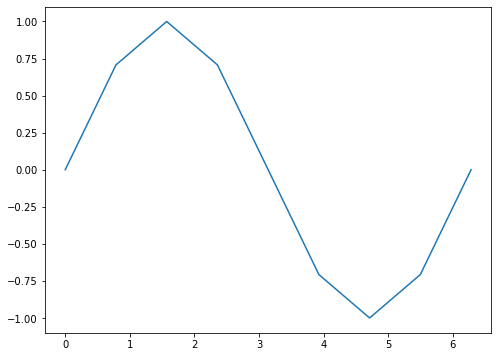

In [17]:
x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
y = np.sin(x)

plt.plot(x, y)
plt.show()

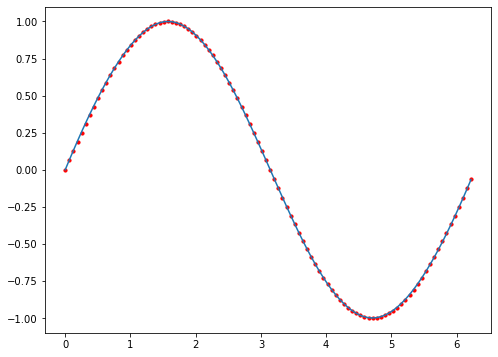

In [18]:
tck = interpolate.splrep(x, y, s=0)
xnew = np.arange(0, 2*np.pi, np.pi/50)
y_real = np.sin(xnew)
ynew = interpolate.splev(xnew, tck, der=0)

plt.plot(xnew, ynew)
plt.scatter(xnew, y_real, color='r', s=10)
plt.show()

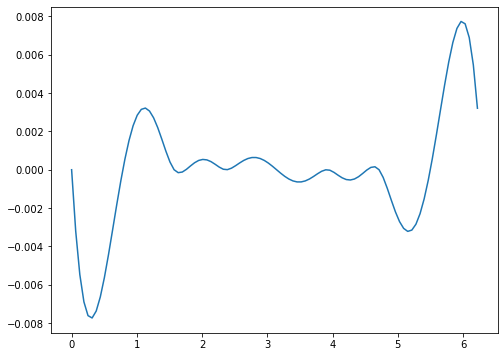

In [19]:
dy = y_real - ynew
plt.plot(xnew, dy)
plt.show()

### NMR baseline artifact

In [20]:
from scipy import stats
from scipy.stats import truncnorm

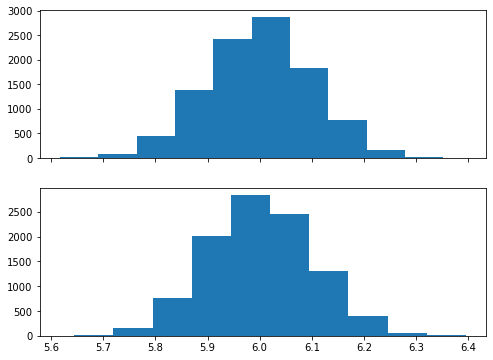

In [21]:
lower, upper = 5.5, 6.5
mu, sigma = 6.0, 0.1
X = stats.truncnorm(
    (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
N = stats.norm(loc=mu, scale=sigma)

fig, ax = plt.subplots(2, sharex=True)
ax[0].hist(X.rvs(10000))
ax[1].hist(N.rvs(10000))
plt.show()

In [158]:
l, u = 5.5, 6.5
mu, std = 6.0, 0.1

a = (l - mu) / sd
b = (u - mu) / sd
stats.truncnorm(a, b, loc=mu, scale=sd).rvs(1)[0]

In [61]:
n = np.random.randint(2, 11)
x = spec.shift
D = np.random.uniform(0.1, 0.6, n+1)

if 2 < n:
    bin_size = spec.shift_cutoff/n
    std = bin_size/10
    b = 0.5*bin_size/std
    A = np.array([0]
                 +[truncnorm(-b, b, loc=bin_size*mu, scale=std).rvs(1)[0] for mu in range(1, n)]
                 +[spec.shift_cutoff])

    tck = interpolate.splrep(A, D, s=0)
    y = interpolate.splev(x, tck, der=0)
else:
    y = (D[-1]-D[0])/spec.shift_cutoff*x + D[0]

In [94]:
spec.artifact(baseline=True)
yr =spec.spectra_artifact

spec.artifact(baseline=True)
yi =spec.spectra_artifact

y = yr +1j*yi
Y = np.fft.ifft(y)

In [103]:
%matplotlib ipympl
plt.style.use('default')
plt.plot(spec.shift, Y.real)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

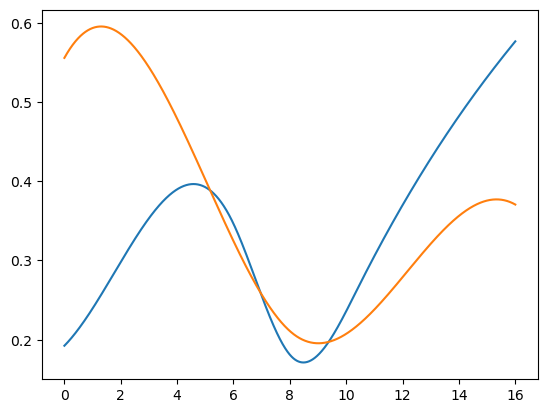

In [102]:
plt.plot(spec.shift, yr)
plt.plot(spec.shift, yi)
plt.show()

In [86]:
spec.measure(sample=nmr_sample)

In [91]:
plt.style.use('default')

In [92]:
%matplotlib ipympl
plt.rcParams['figure.figsize'] = [6, 4]
plt.plot(x, spec.spectra.real)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

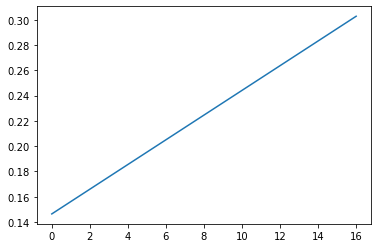

In [63]:
%matplotlib inline
plt.plot(x, y)
plt.show()

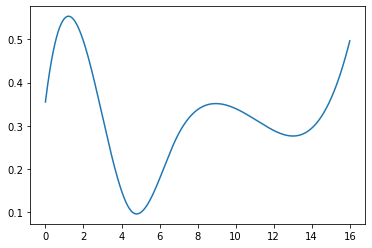

In [84]:
%matplotlib inline
plt.plot(x, spec.spectra_artifact)
plt.show()

In [28]:
from scipy.stats import chi
from scipy.special import gamma

plt.rcParams['figure.figsize'] = [6, 4]

a = 0.00001
b = 1 - a

for k in range(2, 20):
    k = k
    x = np.linspace(chi.ppf(a, k), chi.ppf(b, k), 100)
    y = chi.pdf(x, k)
    plt.plot(x, y)

plt.show()

def cm(k):
    return np.sqrt(2)*gamma((k+1)/2)/gamma(k/2)

plt.rcParams['figure.figsize'] = [6, 10]
means = [cm(k) for k in range(2, 20)]
ks = np.linspace(2, 19, len(means))
plt.plot(ks, means)
plt.scatter(ks, means, color='r')
plt.xticks(ks)
plt.yticks(means)
plt.show()

chi.ppf?

Signature: chi.ppf(q, *args, **kwds)
Docstring:
Percent point function (inverse of `cdf`) at q of the given RV.

Parameters
----------
q : array_like
    lower tail probability
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
-------
x : array_like
    quantile corresponding to the lower tail probability q.
File:      ~/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py
Type:      method
